In [15]:
import numpy as np
import matplotlib.pyplot as plt
import mne
from scipy.signal import welch

In [16]:
data_file = "eeg-data.txt"
eeg_data = np.loadtxt(data_file)
sfreq = eeg_data.size/30

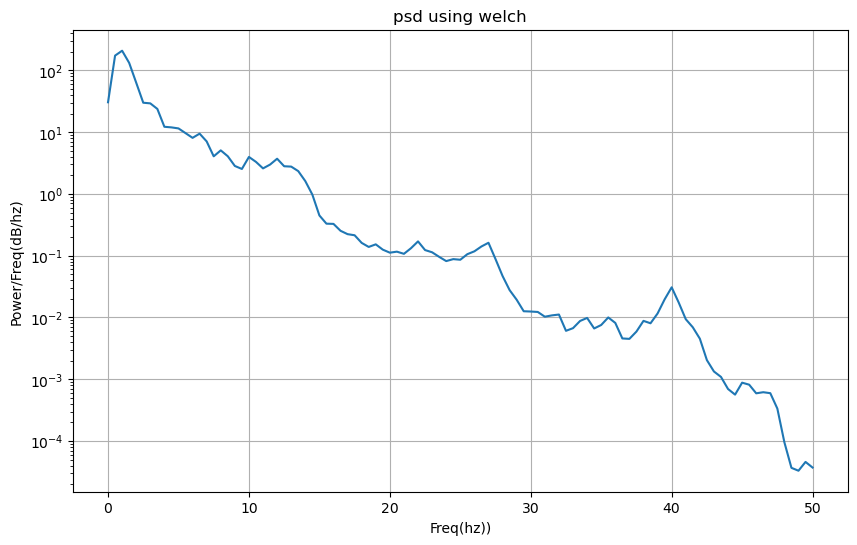

In [17]:
frequencies, psd = welch(eeg_data, sfreq, nperseg=sfreq*2)

plt.figure(figsize=(10, 6))
plt.semilogy(frequencies, psd)
plt.xlabel('Freq(hz))')
plt.ylabel('Power/Freq(dB/hz)')
plt.title('psd using welch')
plt.grid(True)
plt.show()

In [18]:
delta_band = (1, 4)
theta_band = (4, 8)
alpha_band = (8, 13)
beta_band = (13, 30)

delta_idx= np.where((frequencies >= delta_band[0])&(frequencies <= delta_band[1]))[0]
theta_idx = np.where((frequencies >=theta_band[0])&(frequencies <= theta_band[1]))[0]
alpha_idx= np.where((frequencies >= alpha_band[0])&(frequencies<= alpha_band[1]))[0]
beta_idx = np.where((frequencies >= beta_band[0])&(frequencies <= beta_band[1]))[0]

delta_power = np.trapz(psd[delta_idx], frequencies[delta_idx])
theta_power = np.trapz(psd[theta_idx], frequencies[theta_idx])
alpha_power = np.trapz(psd[alpha_idx], frequencies[alpha_idx])
beta_power = np.trapz(psd[beta_idx], frequencies[beta_idx])

print(f"Delta:{delta_power}")
print(f"Theta:{theta_power}")
print(f"Alpha:{alpha_power}")
print(f"Beta:{beta_power}")

Delta:194.0557111991174
Theta:35.18472167324127
Alpha:16.355849443380027
Beta:5.319088011200914


In [19]:
total_power = np.sum(psd)

delta_relative_power = delta_power / total_power
theta_relative_power = theta_power / total_power
alpha_relative_power = alpha_power / total_power
beta_relative_power = beta_power / total_power

print("\n Rel Bandpowers:")
print(f"Delta: {delta_relative_power}")
print(f"Theta: {theta_relative_power}")
print(f"Alpha: {alpha_relative_power}")
print(f"Beta: {beta_relative_power}")


 Rel Bandpowers:
Delta: 0.2396980875594495
Theta: 0.04346025398723644
Alpha: 0.0202027851062098
Beta: 0.006570150478781958
